In [4]:
# importing libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy.stats as stats

In [6]:
# read the file

In [7]:
movies = pd.read_excel('IMDB_movies.xlsx', index_col= 'Rank')

In [8]:
movies.head()

,Name,Year,Rating,Users_count,Director,Actors
Rank,,,,,,
1,The Shawshank Redemption,1994,9.2,2731126,Frank Darabont,"Tim Robbins, Morgan Freeman"
2,The Godfather,1972,9.2,1898939,Francis Ford Coppola,"Marlon Brando, Al Pacino"
3,The Dark Knight,2008,9.0,2704222,Christopher Nolan,"Christian Bale, Heath Ledger"
4,The Godfather Part II,1974,9.0,1294761,Francis Ford Coppola,"Al Pacino, Robert De Niro"
5,12 Angry Men,1957,9.0,808047,Sidney Lumet,"Henry Fonda, Lee J. Cobb"


In [9]:
#The Shawshank Redemption has the highest rating

In [10]:
movies.describe()

,Year,Rating,Users_count
count,250.000000,250.000000,2.500000e+02
mean,1986.524000,8.251600,6.525754e+05
std,25.230373,0.235114,5.278907e+05
min,1921.000000,8.000000,3.162700e+04
25%,1966.250000,8.100000,2.162435e+05
50%,1994.000000,8.200000,5.187020e+05
75%,2006.750000,8.400000,9.734362e+05
max,2023.000000,9.200000,2.731126e+06


In [11]:
# There are movies old as 1921!

<AxesSubplot: xlabel='Rating', ylabel='Count'>

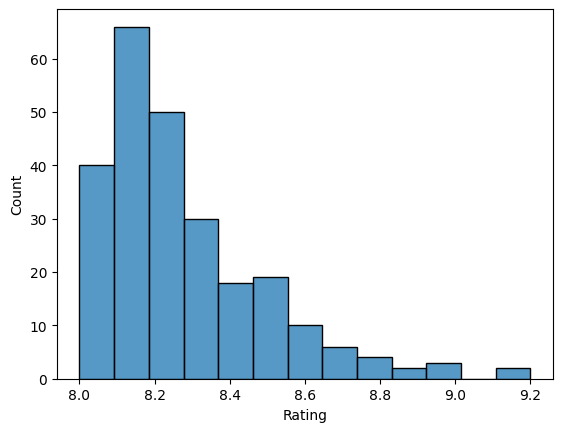

In [12]:
# Let's check the distribution of rating
sns.histplot(movies.Rating)

In [13]:
# most ratings are around 8.2

<AxesSubplot: xlabel='Year', ylabel='Count'>

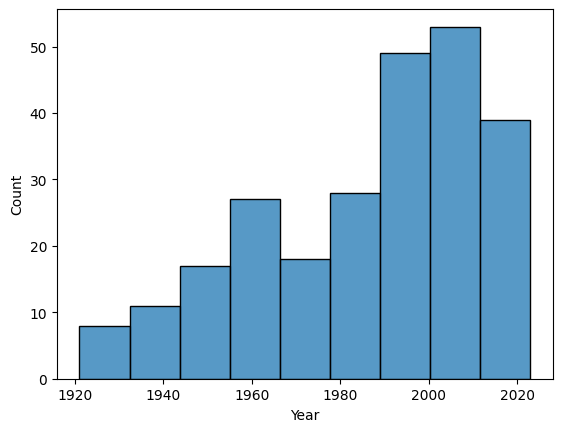

In [14]:
# Let's check the distribution of years
sns.histplot(movies.Year)

In [15]:
# most of them are of recent decades

In [16]:
# find the oldest and newest movies
oldest_movie = movies[movies['Year'] == movies['Year'].min()]
latest_movie = movies[movies['Year'] == movies['Year'].max()]
oldest_movie

,Name,Year,Rating,Users_count,Director,Actors
Rank,,,,,,
128,The Kid,1921,8.2,128831,Charles Chaplin,"Charles Chaplin, Edna Purviance"


In [17]:
latest_movie

,Name,Year,Rating,Users_count,Director,Actors
Rank,,,,,,
177,John Wick: Chapter 4,2023,8.1,128498,Chad Stahelski,"Keanu Reeves, Laurence Fishburne"


In [18]:
director = movies.groupby('Director')['Rating'].agg(['count', 'mean']).reset_index().sort_values('count',ascending=False)
director['mean']=director['mean'].round(2)
director = director.rename(columns={'count':'Movies count', 'mean':'Average rating'})
best_directors = director[director['Movies count']==director['Movies count'].max()]
best_directors

,Director,Movies count,Average rating
134,Steven Spielberg,7,8.36
89,Martin Scorsese,7,8.30
2,Akira Kurosawa,7,8.21
132,Stanley Kubrick,7,8.27
19,Christopher Nolan,7,8.53


In [19]:
# Create a list of all actors in the dataset
all_actors = []
for actors in movies['Actors']:
    all_actors += actors.split(', ')
all_actors = list(set(all_actors))

# Create a new dataframe with each actor and their number of movies
actor_counts = pd.DataFrame({'Actor': all_actors})
actor_counts['Movie Count'] = actor_counts['Actor'].apply(lambda x: len(movies[movies['Actors'].str.contains(x)]))
actor_counts = actor_counts.sort_values('Movie Count', ascending=False)
actor_counts

,Actor,Movie Count
197,Robert De Niro,9
61,Harrison Ford,6
204,Tom Hanks,6
268,Charles Chaplin,5
102,Leonardo DiCaprio,5
...,...,...
135,Charlize Theron,1
133,François Cluzet,1
132,Philip Seymour Hoffman,1
131,Jay Baruchel,1


In [20]:
# Robert de niro has starred most in the top 250 movies let's check which movies was that

In [21]:
movies[movies['Actors'].str.contains('Robert De Niro')]


,Name,Year,Rating,Users_count,Director,Actors
Rank,,,,,,
4,The Godfather Part II,1974,9.0,1294761,Francis Ford Coppola,"Al Pacino, Robert De Niro"
17,GoodFellas,1990,8.7,1185402,Martin Scorsese,"Robert De Niro, Ray Liotta"
76,Joker,2019,8.3,1341331,Todd Phillips,"Joaquin Phoenix, Robert De Niro"
80,Once Upon a Time in America,1984,8.3,358697,Sergio Leone,"Robert De Niro, James Woods"
109,Heat,1995,8.2,669998,Michael Mann,"Al Pacino, Robert De Niro"
117,Taxi Driver,1976,8.2,857890,Martin Scorsese,"Robert De Niro, Jodie Foster"
136,Casino,1995,8.2,531946,Martin Scorsese,"Robert De Niro, Sharon Stone"
157,Raging Bull,1980,8.1,361433,Martin Scorsese,"Robert De Niro, Cathy Moriarty"
191,The Deer Hunter,1978,8.1,345546,Michael Cimino,"Robert De Niro, Christopher Walken"


In [22]:
# It's all best movies

In [23]:
Most_watched_movies = movies.sort_values('Users_count',ascending=False)[0:9]
Most_watched_movies

,Name,Year,Rating,Users_count,Director,Actors
Rank,,,,,,
1,The Shawshank Redemption,1994,9.2,2731126,Frank Darabont,"Tim Robbins, Morgan Freeman"
3,The Dark Knight,2008,9.0,2704222,Christopher Nolan,"Christian Bale, Heath Ledger"
14,Inception,2010,8.7,2400242,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt"
12,Fight Club,1999,8.7,2174074,David Fincher,"Brad Pitt, Edward Norton"
11,Forrest Gump,1994,8.8,2124952,Robert Zemeckis,"Tom Hanks, Robin Wright"
8,Pulp Fiction,1994,8.8,2098580,Quentin Tarantino,"John Travolta, Uma Thurman"
16,The Matrix,1999,8.7,1948485,Lana Wachowski,"Keanu Reeves, Laurence Fishburne"
9,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,1907783,Peter Jackson,"Elijah Wood, Ian McKellen"
2,The Godfather,1972,9.2,1898939,Francis Ford Coppola,"Marlon Brando, Al Pacino"


In [24]:
# most seen movies are under 17th rank

In [25]:
# Let's do a hypothesis test on rating for two famous directors
# Christopher Nolan and Tarantino

In [28]:
director1= movies[movies['Director']=='Christopher Nolan']['Rating']
director2= movies[movies['Director']=='Quentin Tarantino']['Rating']

In [31]:
t_stat, p_val = stats.ttest_ind(director1, director2)
print('T - statistic', t_stat)
print('P - Value', p_val)

T - statistic 0.9574625175278833
P - Value 0.36090894717476774


The t-test has produced a t-statistic of 0.957 and a p-value of 0.361. The t-statistic measures the difference between the means of the two samples relative to the variation within each sample. The p-value represents the probability of observing a t-statistic as extreme as the one obtained under the null hypothesis of no difference between the population means.

Based on the obtained p-value of 0.361, which is larger than the commonly used significance level of 0.05, we can conclude that there is not enough evidence to reject the null hypothesis of no difference between the population means of the two groups. In other words, we cannot conclude that the two directors have different performances based on the available data